# Human Face Emotions Classification


# Load Data

1. defines two variables data_train and data_test, which contain the file paths of the training and testing datasets, respectively.

2. Next, there is a function defined called convert_df. This function is used to convert the dataset into a pandas DataFrame for easier handling and analysis.

3. The convert_df function takes one argument dataset, which should be a file path to the dataset.

4. Inside the convert_df function, the first line img_dir = Path(dataset) converts the dataset path into a Path object using the Path function from the pathlib module. The pathlib module provides a convenient way to handle file paths in Python.

5. The code then uses glob to find all the files with the extension ".jpg" within the dataset directory and its subdirectories. filename = list(img_dir.glob(r'*/.jpg')) returns a list of all the file paths that match the specified pattern.

6. After obtaining the list of file paths (filename) and their corresponding labels (label), the code converts them into pandas Series using pd.Series.

7. The pd.concat() function is then used to concatenate the two Series (filename and label) along the columns (axis=1), creating a DataFrame named image_df. This DataFrame will have two columns: "Filepath" and "Label".

8. The convert_df function returns the resulting DataFrame image_df.

9. Finally, the convert_df function is called twice with the data_train and data_test paths, respectively, to create two DataFrames: image_train and image_test.

**In summary, this code takes the file paths of images in the training and testing datasets, extracts their corresponding labels and organizes them into pandas DataFrames for further processing or analysis.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the path to your dataset in Google Drive
data_dir = '/content/drive/MyDrive/data'

def convert_img_to_df(dataset):
    img_dir = Path(dataset)
    # Use recursive glob to find all .jpg files in subfolders
    filename = list(img_dir.glob(r'**/*.jpg'))
    # Extract the label from the parent folder name
    label = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filename))

    # Convert to pandas Series
    filename = pd.Series(filename, name='Filepath').astype(str)
    label = pd.Series(label, name='Label')
    # Combine into a DataFrame
    img_df = pd.concat([filename, label], axis=1)
    return img_df

# Create the DataFrame
img_df = convert_img_to_df(data_dir)

# Display the first few rows
img_df.head()

,Filepath,Label
0,/content/drive/MyDrive/data/Happy/10-Habits-of...,Happy
1,/content/drive/MyDrive/data/Happy/05-12-21-hap...,Happy
2,/content/drive/MyDrive/data/Happy/05-12-21-hap...,Happy
3,/content/drive/MyDrive/data/Happy/1920px-face-...,Happy
4,/content/drive/MyDrive/data/Happy/170404-happy...,Happy


**Check shape Image**

In [ ]:
img = plt.imread(img_df['Filepath'].iloc[1])
img.shape

(880, 1400, 3)

# summary overview of the distribution of Images labels

**summary overview of the distribution of Images labels . It creates a pie chart and a bar plot to visualize the percentage and count of each Image label, respectively**

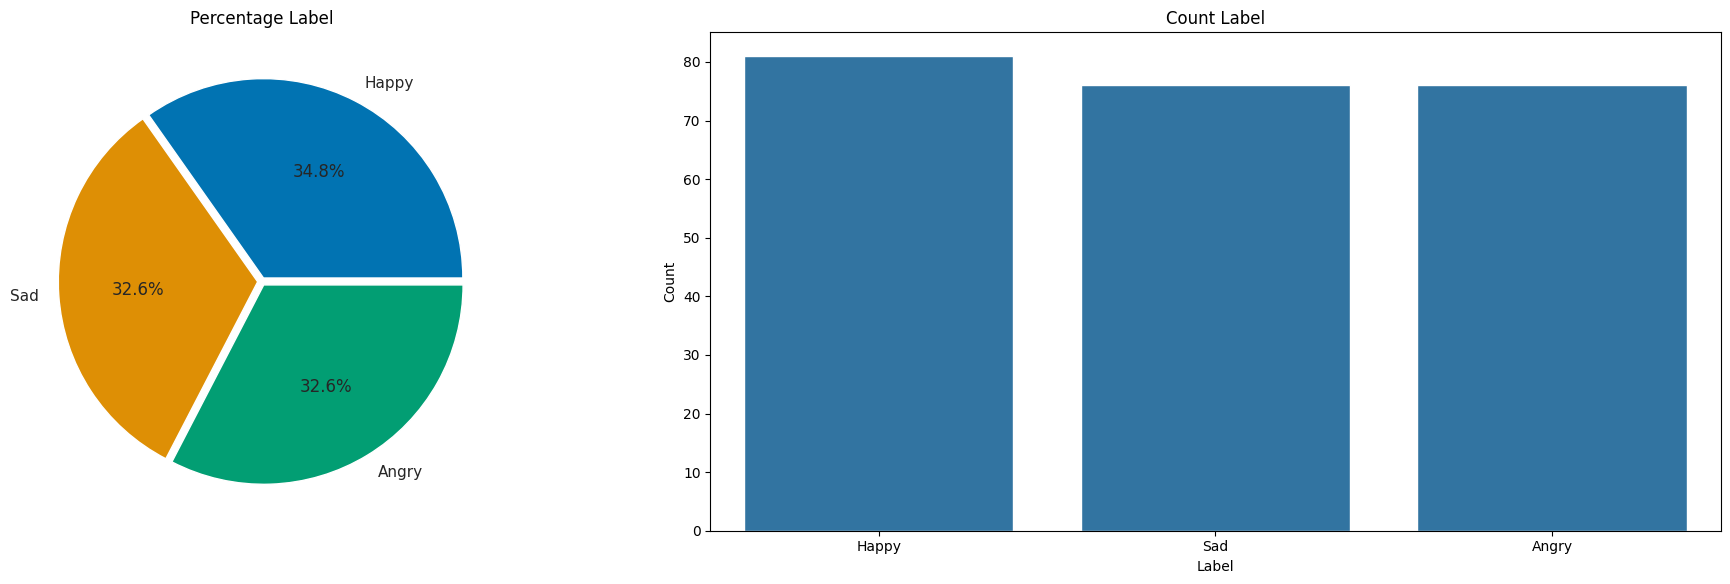

In [ ]:
#Label Count
label_count = img_df['Label'].value_counts()

#Setting
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.set_theme(style='darkgrid', palette='colorblind')
color = sns.color_palette(palette='colorblind')
explode = [0.02]*len(label_count)

#Pie chart
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

#Barplot
sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

#Show
plt.tight_layout()
plt.show()

# Show Image

**generates a 4x4 grid of random images from the image_train DataFrame and displays them with their corresponding labels as titles. Let's break down the code step by step:**

**1. random_index = np.random.randint(0, len(image_train), 16):** This line generates an array of 16 random integers ranging from 0 to the number of rows in the image_train DataFrame. The np.random.randint function is from the NumPy library, and it is used here to select 16 random indices from the DataFrame.

**2. fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []}):** This line creates a 4x4 grid of subplots using Matplotlib's subplots function. The fig variable represents the entire figure, while the axes variable is an array of Axes objects corresponding to each subplot. The subplot_kw parameter is used to set properties of the subplots, in this case, removing the x and y-axis ticks.

**3. The following block of code uses a loop to iterate through the 4x4 grid of subplots and display images along with their labels:**

- enumerate(axes.flat) generates pairs of (index, ax) for each subplot in the flattened array of axes. The enumerate function is used to loop through the subplots while keeping track of the index and the corresponding subplot object (ax).
- img = plt.imread(image_train['Filepath'].iloc[random_index[i]]): This line reads the image corresponding to the random index random_index[i] from the image_train DataFrame using the plt.imread function from Matplotlib.
- ax.imshow(img): This displays the image on the current subplot ax.
1. ax.set_title(image_train['Label'].iloc[random_index[i]]): This sets the title of the current subplot to the label of the corresponding image from the image_train DataFrame.

2. plt.tight_layout(): This line ensures that the subplots are properly arranged within the figure to avoid overlapping.

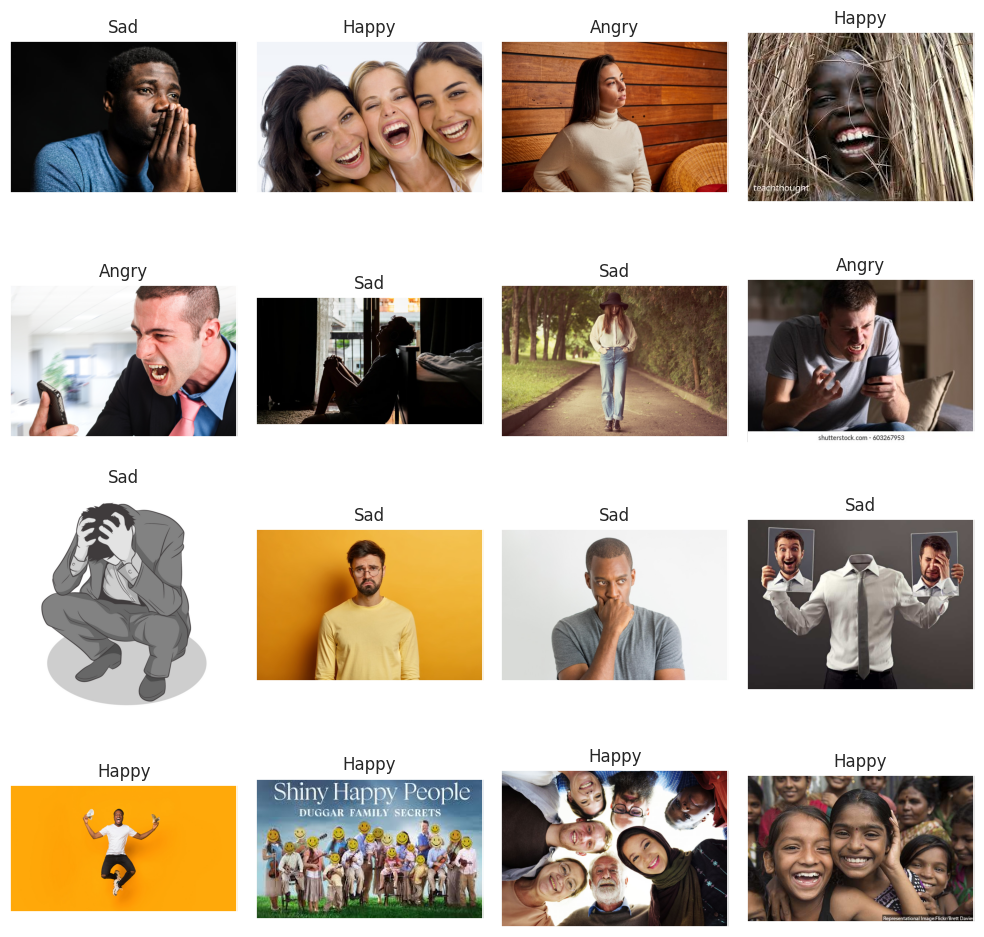

In [ ]:
random_index = np.random.randint(0,len(img_df),16)
fig,axes = plt.subplots(nrows=4,ncols=4,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
  img = plt.imread(img_df['Filepath'].iloc[random_index[i]])
  ax.imshow(img)
  ax.set_title(img_df['Label'].iloc[random_index[i]])
plt.tight_layout()
plt.show()

**preparing the training and validation datasets for a deep learning model using the Keras ImageDataGenerator. It involves splitting the image_train DataFrame into training and validation sets and setting up data generators for image processing during training.**

**1. train, val** = train_test_split(image_train, test_size=0.2): This line uses the train_test_split function from scikit-learn to split the image_train DataFrame into two parts: train and val (validation). The test_size=0.2 argument specifies that 20% of the data will be used for validation, while the remaining 80% will be used for training.

**2. datagen** = ImageDataGenerator(rescale=1./255): Here, an ImageDataGenerator object is created. This object will be used to augment the image data during training and validation. The rescale=1./255 argument scales the pixel values of the images between 0 and 1, which is a common practice for neural networks that use image data.

**3. Setting up the data generators:**

- train_set: This data generator is created using datagen.flow_from_dataframe() to flow image data from the train DataFrame. It takes the file paths ('Filepath') and corresponding labels ('Label') as input. The generator yields batches of 32 images at a time (batch_size=32), and the labels are represented in a categorical format (class_mode='categorical').
- val_set: This data generator is similar to train_set but is created for the validation data (val DataFrame).

**4. The arguments used in flow_from_dataframe:**

- dataframe: The DataFrame from which to load the data.
- x_col: The column name in the DataFrame that contains the file paths of the images.
- y_col: The column name in the DataFrame that contains the labels.
- batch_size: The number of samples in each batch.
- class_mode: The type of labels provided; 'categorical' indicates that the labels are one-hot encoded for multiclass classification.
- seed: Random seed for data shuffling and transformations.
- shuffle: Whether to shuffle the data at the beginning of each epoch.
- target_size: The size to which all the images will be resized during the loading process.

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Split data
img_train , test = train_test_split(img_df,test_size=0.1)
train, val = train_test_split(img_train,test_size=0.2)

#For train
datagen = ImageDataGenerator(rescale=1./255,
                             width_shift_range=0.15,
                             height_shift_range=0.15,
                             horizontal_flip=True,
                             vertical_flip=True)

# For test
datagen_test = ImageDataGenerator(rescale=1./255)

train_set = datagen.flow_from_dataframe(dataframe=train,
                                        x_col='Filepath',
                                        y_col='Label',
                                        batch_size=32,
                                        target_size=(224,224),
                                        shuffle=True,
                                        seed=42,
                                        class_mode='categorical'
                                        )

val_set = datagen_test.flow_from_dataframe(dataframe=val,
                                        x_col='Filepath',
                                        y_col='Label',
                                        batch_size=32,
                                        target_size=(224,224),
                                        shuffle=True,
                                        seed=42,
                                        class_mode='categorical'
                                        )

test_set = datagen_test.flow_from_dataframe(dataframe=test,
                                        x_col='Filepath',
                                        y_col='Label',
                                        batch_size=32,
                                        target_size=(224,224),
                                        shuffle=False,
                                        seed=42,
                                        class_mode='categorical'
                                        )

Found 167 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.


# Model

**Defines a simple Convolutional Neural Network (CNN) model using the Keras Sequential API.**

**1. model = Sequential():** This line creates a new Keras Sequential model. A Sequential model is appropriate for a plain stack of layers, where each layer has exactly one input tensor and one output tensor.

**2. model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3))):** The first layer is a 2D convolutional layer (Conv2D) with 10 filters, each of size 3x3. The activation function used is ReLU (Rectified Linear Unit). The input_shape parameter is set to (224, 224, 3), representing the height, width, and number of channels of the input images (assuming RGB images with 3 color channels).

**3. model.add(Conv2D(10, (3, 3), activation='relu')):** The second convolutional layer with the same settings as the first one.

**4. model.add(MaxPool2D((2, 2), padding='valid')):** This is a max-pooling layer (MaxPool2D) with a pool size of 2x2 and 'valid' padding. Max-pooling reduces the spatial dimensions of the feature maps, which helps in reducing computational complexity and overfitting.

**5. Two more blocks of convolutional and max-pooling layers are added in a similar fashion:**

- model.add(Conv2D(10, (3, 3), activation='relu'))
- model.add(Conv2D(10, (3, 3), activation='relu'))
- model.add(MaxPool2D((2, 2), padding='valid'))
- model.add(Flatten()): This layer flattens the 3D output tensor from the previous convolutional layers into a 1D vector. It is required to connect the convolutional part of the model to the fully connected part.

**6. model.add(Dense(128, activation='relu')):** This is a fully connected layer (Dense) with 128 units and ReLU activation function.

**7. model.add(Dropout(0.45)):** Dropout is a regularization technique used to prevent overfitting. It randomly sets a fraction (0.45 in this case) of the input units to 0 at each update during training.

**8. model.add(Dense(3, activation='softmax')):** The final fully connected layer with 3 units (assuming there are three classes in the output). The activation function used is softmax, which converts the output values into probability-like values summing up to 1. It's commonly used for multi-class classification problems.

**9. model.summary():** This line prints a summary of the model, showing the layer types, output shapes, and the number of parameters in each layer.

In [ ]:
from keras import Sequential
from keras.layers import Dense, MaxPool2D,Conv2D,Flatten,Dropout

model = Sequential()
model.add(Conv2D(10,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(10,(3,3),activation='relu'))
model.add(MaxPool2D((2,2),padding='valid'))

model.add(Conv2D(10,(3,3),activation='relu'))
model.add(Conv2D(10,(3,3),activation='relu'))
model.add(MaxPool2D((2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(3,activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,595,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,045 (13.73 MB)

 Trainable params: 3,599,045 (13.73 MB)

 Non-trainable params: 0 (0.00 B)

**During the training process, the model will undergo forward and backward passes on the training data, adjusting its weights to minimize the defined loss function (categorical cross-entropy) using the Adam optimizer. The model's performance will be evaluated on the validation data during each epoch, and the results will be stored in the history variable.**

**The history variable will contain information about the training and validation accuracy and loss for each epoch, which can be used for visualizing and analyzing the model's performance over time.**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_set,
                    steps_per_epoch=len(train_set),
                    validation_data=val_set,
                    validation_steps=len(val_set),
                    epochs=30,
                    verbose=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4050 - loss: 1.0981 - val_accuracy: 0.3571 - val_loss: 1.0976
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3587 - loss: 1.0893 - val_accuracy: 0.3810 - val_loss: 1.0688
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 887ms/step - accuracy: 0.4435 - loss: 1.0628 - val_accuracy: 0.4048 - val_loss: 1.0683
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 875ms/step - accuracy: 0.5197 - loss: 1.0404 - val_accuracy: 0.4048 - val_loss: 1.0900
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4259 - loss: 1.0364 - val_accuracy: 0.4048 - val_loss: 1.0152
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 966ms/step - accuracy: 0.5348 - loss: 0.9443 - val_accuracy: 0.4286 - val_loss: 1.1156
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4546 - loss: 1.0700 - val_accuracy: 0.4524 - val_loss: 1.0359
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5683 - loss: 0.9574 - val_accuracy: 0.4762 - val_loss: 1.1067
Ep

**generates two subplots side by side to visualize the training and validation performance of the model. Then, it evaluates the model on the test dataset using the evaluate method.**

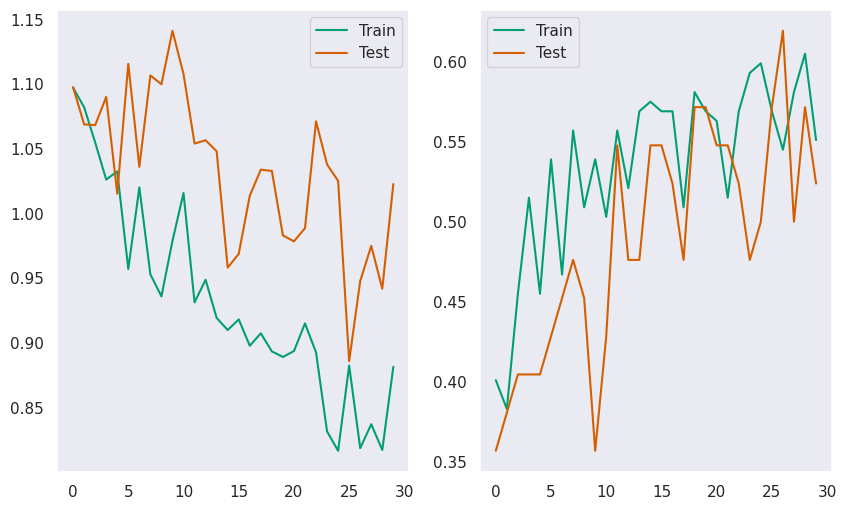

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train',c='g')
plt.plot(history.history['val_loss'],label='Test',c='r')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Train',c='g')
plt.plot(history.history['val_accuracy'],label='Test',c='r')
plt.grid()
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(test_set,steps=len(test_set),verbose=0)
print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

Loss: 0.80
Accuracy: 0.54


# Pretained Model

**A pretrained model is a pre-trained deep learning model that has been trained on a large dataset by researchers or organizations for a specific task, such as image recognition, natural language processing, or object detection. These models are typically trained on powerful hardware and large-scale datasets for an extended period.**

**The key characteristics of pretrained models are:**

1. Transfer Learning: Pretrained models serve as a starting point for new machine learning tasks. Instead of training a model from scratch on a new dataset, transfer learning allows us to use the knowledge and representations learned by the pretrained model to solve a different but related problem. This approach can significantly reduce the amount of data and time required for training and can be very effective, especially when the new dataset is small.

2. Feature Extraction: Pretrained models are powerful feature extractors. They learn to identify low-level and high-level features in data, such as edges, textures, and object shapes. The earlier layers of a pretrained model capture general features that are common across many datasets, while the later layers capture more specific features related to the original task the model was trained on.

3. Model Architectures: Pretrained models often come with popular and sophisticated architectures like VGG, ResNet, Inception, BERT, GPT, etc. These architectures have been developed and fine-tuned over time by researchers and have shown state-of-the-art performance on various benchmark tasks.

4. Availability: Many pretrained models, especially for computer vision and natural language processing tasks, are available as part of popular deep learning frameworks like TensorFlow, Keras, PyTorch, and Hugging Face's Transformers library. This accessibility makes it easier for researchers and developers to leverage the power of these models in their projects.

**In summary, pretrained models are a boon to the deep learning community as they provide a head start for solving complex machine learning problems, facilitate transfer learning, and democratize access to advanced models and architectures, enabling developers and researchers to build more accurate and sophisticated models for their own specific tasks.**

# VGG16

**using Keras to import the VGG16 pre-trained model and set up an ImageDataGenerator with a preprocessing function.**

**1. from keras.applications.vgg16 import VGG16, preprocess_input:** This line imports the VGG16 pre-trained model from Keras and the preprocess_input function, which is used to preprocess the input images before passing them to the VGG16 model.

**2. datagen = ImageDataGenerator(preprocessing_function=preprocess_input):** This line sets up an ImageDataGenerator object with the preprocess_input function as the preprocessing_function. The ImageDataGenerator is a powerful utility in Keras that allows on-the-fly data augmentation and preprocessing of images during model training.

**The preprocess_input function is used specifically for the VGG16 model. It applies appropriate preprocessing to the images to match the format that the VGG16 model was trained on. Preprocessing typically includes scaling the pixel values to a specific range and channel-wise normalization.**

**By using the ImageDataGenerator with the preprocess_input function, you can feed images to the VGG16 model in real-time with proper preprocessing, making it convenient for image classification tasks and transfer learning.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             width_shift_range=0.15,
                             height_shift_range=0.15,
                             vertical_flip=True,
                             horizontal_flip=True)
datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input)
train_set = datagen.flow_from_dataframe(dataframe=train,
                                        x_col='Filepath',
                                        y_col= 'Label',
                                        batch_size=32,
                                        class_mode='categorical',
                                        seed = 42,
                                        shuffle=True,
                                        target_size=(224,224))

val_set = datagen_test.flow_from_dataframe(dataframe=val,
                                        x_col='Filepath',
                                        y_col= 'Label',
                                        batch_size=32,
                                        class_mode='categorical',
                                        seed = 42,
                                        shuffle=True,
                                        target_size=(224,224))

test_set = datagen_test.flow_from_dataframe(dataframe=test,
                                        x_col='Filepath',
                                        y_col= 'Label',
                                        batch_size=32,
                                        class_mode='categorical',
                                        seed = 42,
                                        shuffle=False,
                                        target_size=(224,224))

Found 167 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.


**use transfer learning to create a new model by leveraging a pretrained VGG16 model as a feature extractor.**

**1. base_vgg = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False):** This line loads the VGG16 model with weights pretrained on the ImageNet dataset. The input_shape parameter is set to (224, 224, 3) to match the input size of the VGG16 model, assuming RGB images with a size of 224x224 pixels. The include_top=False argument means that the last fully connected layers (the classification layers) of the VGG16 model will not be included in the loaded model.

**2. base_vgg.trainable = False:** This line freezes the weights of the base VGG16 model so that they are not trainable during the fine-tuning process. This step is essential to ensure that the pretrained weights of VGG16 are not updated during the training of the new model, preventing them from being overfit to the new task.

**Model**

In [ ]:
base_vgg = VGG16(weights='imagenet',
                   input_shape=(224,224,3),
                   include_top=False)
base_vgg.trainable = False
vgg_model = Sequential()
vgg_model.add(base_vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(128,activation='relu'))
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(3,activation='softmax'))

vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Compile & Train**

In [ ]:
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_vgg = vgg_model.fit(train_set,
                                  steps_per_epoch=len(train_set),
                                  validation_data=val_set,
                                  validation_steps=len(val_set),
                                  epochs=30,
                                  verbose=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5435 - loss: 0.8355 - val_accuracy: 0.5476 - val_loss: 1.0647
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6157 - loss: 0.7988 - val_accuracy: 0.5476 - val_loss: 1.0437
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6267 - loss: 0.7555 - val_accuracy: 0.5000 - val_loss: 1.4403
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6035 - loss: 0.8622 - val_accuracy: 0.5952 - val_loss: 1.0615
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6599 - loss: 0.6310 - val_accuracy: 0.5952 - val_loss: 0.8854
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6652 - loss: 0.7403 - val_accuracy: 0.4048 - val_loss: 0.9171
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5477 - loss: 0.8456 - val_accuracy: 0.5476 - val_loss: 1.1756
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6805 - loss: 0.7423 - val_accuracy: 0.5476 - val_loss: 0.9373
Epoch 9/30

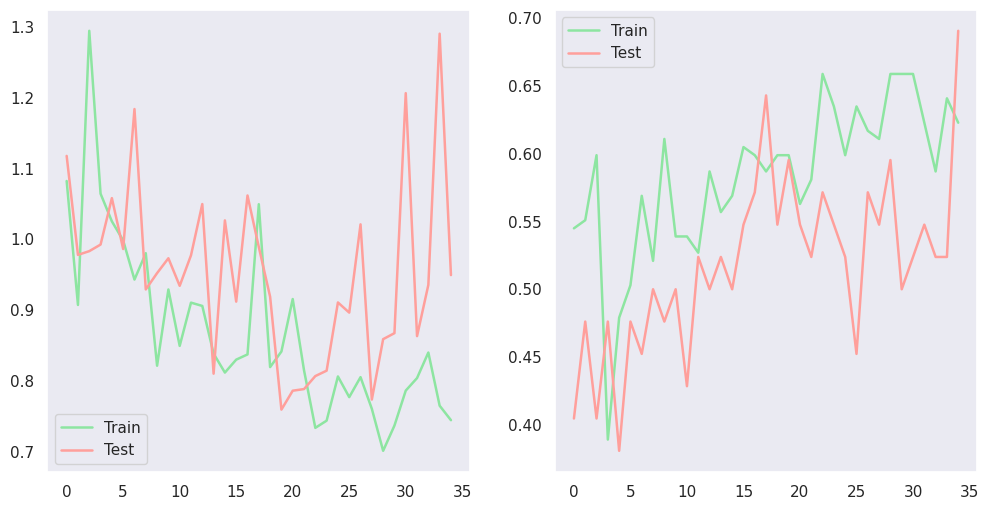

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_vgg.history['loss'],label='Train',c='g',lw=1.8)
plt.plot(history_vgg.history['val_loss'],label='Test',c='r',lw=1.8)
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history_vgg.history['accuracy'],label='Train',c='g',lw=1.8)
plt.plot(history_vgg.history['val_accuracy'],label='Test',c='r',lw=1.8)
plt.legend()
plt.grid()

plt.show()

In [ ]:
score =vgg_model.evaluate(test_set,steps=len(test_set),verbose=0)
print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

Loss: 0.62
Accuracy: 0.71


# prediction

**using the trained vgg_model to make predictions on the test dataset (test_set) and obtaining the predicted class labels for each sample.**

**1. pred = vgg_model.predict(test_set):** This line uses the trained vgg_model to make predictions on the test dataset. The predict method takes the test_set data generator as input and returns the predictions for each sample in the test dataset. The output will be an array of shape (num_samples, num_classes) containing the predicted probabilities for each class for each sample.

**2. pred = np.argmax(pred, axis=1):** After obtaining the predicted probabilities for each class, this line uses NumPy's argmax function with axis=1 to get the index of the class with the highest probability for each sample. The result will be an array of shape (num_samples,) containing the predicted class labels (as integers) for each sample in the test dataset.

In [ ]:
pred = vgg_model.predict(test_set)
pred = np.argmax(pred,axis=1)
pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0, 1, 1, 0, 2])

In [ ]:
labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [ ]:
pred = [labels[k] for k in pred]
pred[:5]

['Angry', 'Happy', 'Happy', 'Angry', 'Sad']

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

y_test = list(test.Label)

print('Accuracy Score: {:.3f}'.format(accuracy_score(y_test,pred)))
print(classification_report(y_test,pred))

Accuracy Score: 0.792
              precision    recall  f1-score   support

       Angry       0.56      0.83      0.67         6
       Happy       1.00      0.89      0.94         9
         Sad       0.86      0.67      0.75         9

    accuracy                           0.79        24
   macro avg       0.80      0.80      0.79        24
weighted avg       0.84      0.79      0.80        24



In [ ]:
score =vgg_model.evaluate(test_set,steps=len(test_set),verbose=0)
print('Loss: {:.2f}'.format(score[0]))
print('Accuracy: {:.2f}'.format(score[1]))

Loss: 1.77
Accuracy: 0.79


**Let's Random Show Image color green where predict True and color red when predict False**

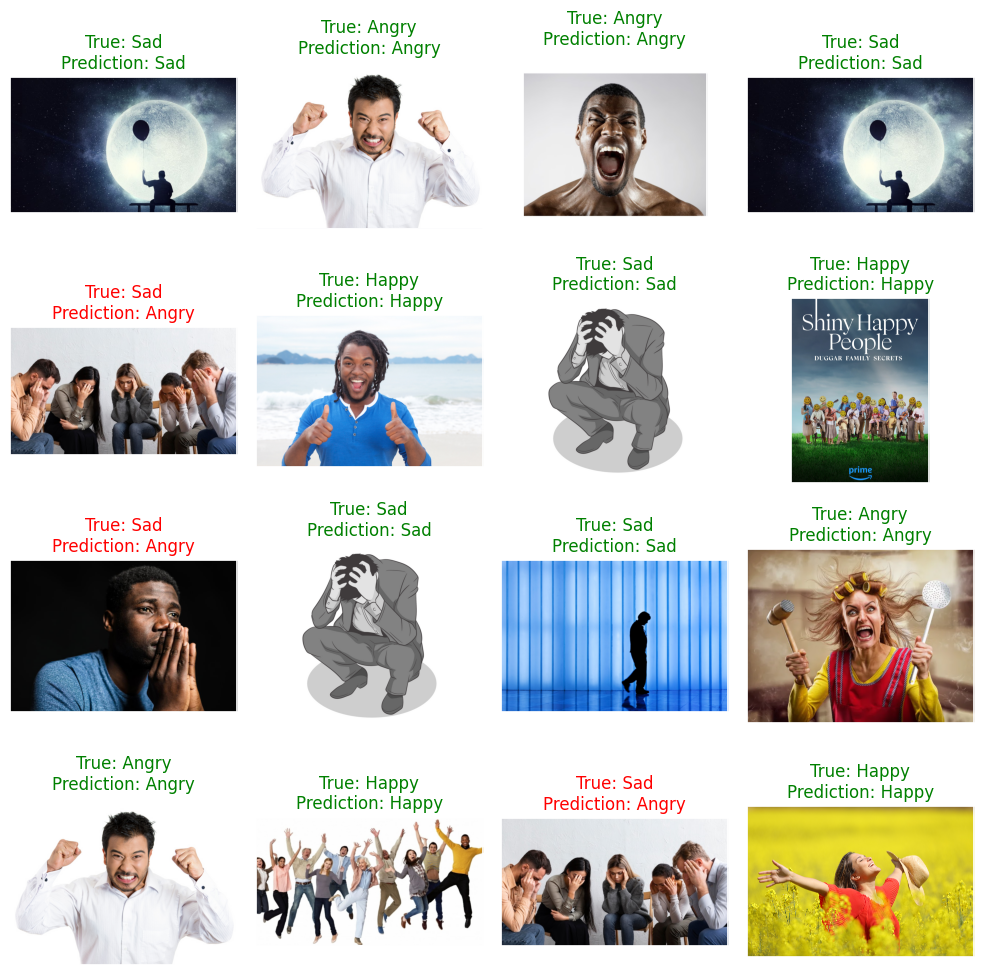

In [ ]:
index_random = np.random.randint(0,len(test),16)
fig,axes = plt.subplots(nrows=4, ncols=4,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

for i ,ax in enumerate(axes.flat):
  img = plt.imread(test['Filepath'].iloc[index_random[i]])
  ax.imshow(img)
  if test['Label'].iloc[index_random[i]] == pred[index_random[i]]:
    color = 'green'
  else:
    color = 'red'
  ax.set_title(f'True: {test.Label.iloc[index_random[i]]}\nPrediction: {pred[index_random[i]]}',color=color)

plt.tight_layout()
plt.show()

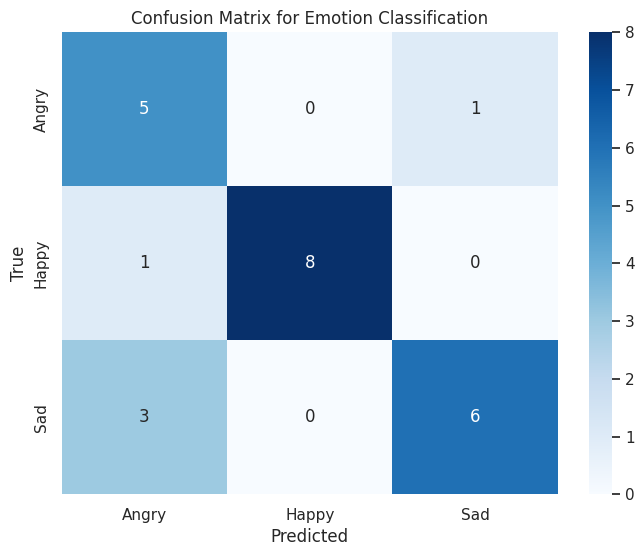

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'test' contains true labels and 'pred' contains predictions from your model
true_labels = test['Label']
predicted_labels = pred  # Replace with your actual predictions array

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Angry', 'Happy', 'Sad'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Happy', 'Sad'], yticklabels=['Angry', 'Happy', 'Sad'])
plt.title('Confusion Matrix for Emotion Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step


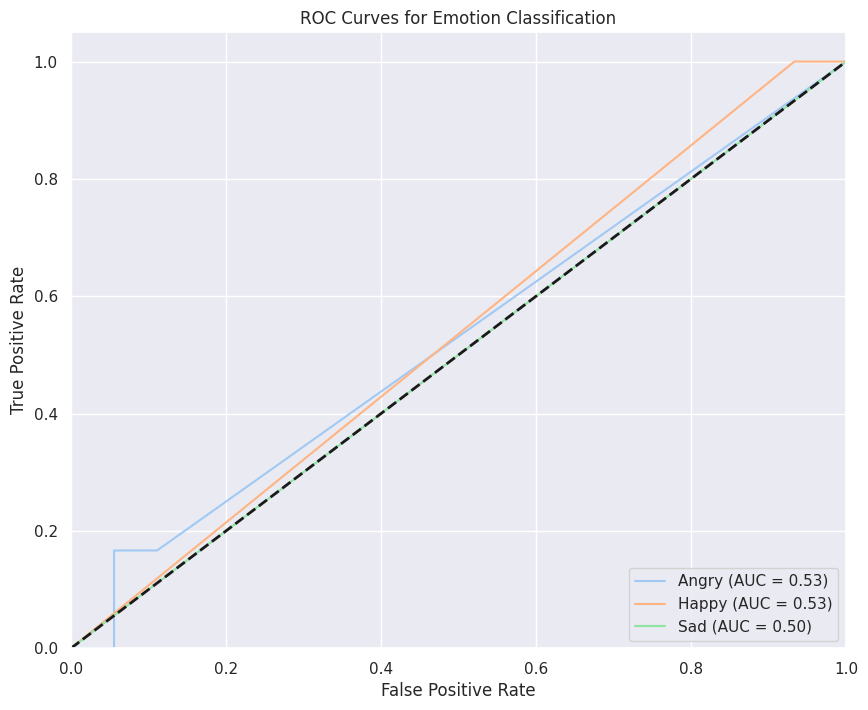

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels for multi-class ROC
classes = ['Angry', 'Happy', 'Sad']
y_test_bin = label_binarize(test['Label'], classes=classes)
y_score = model.predict(test_set)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, emotion in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{emotion} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Emotion Classification')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


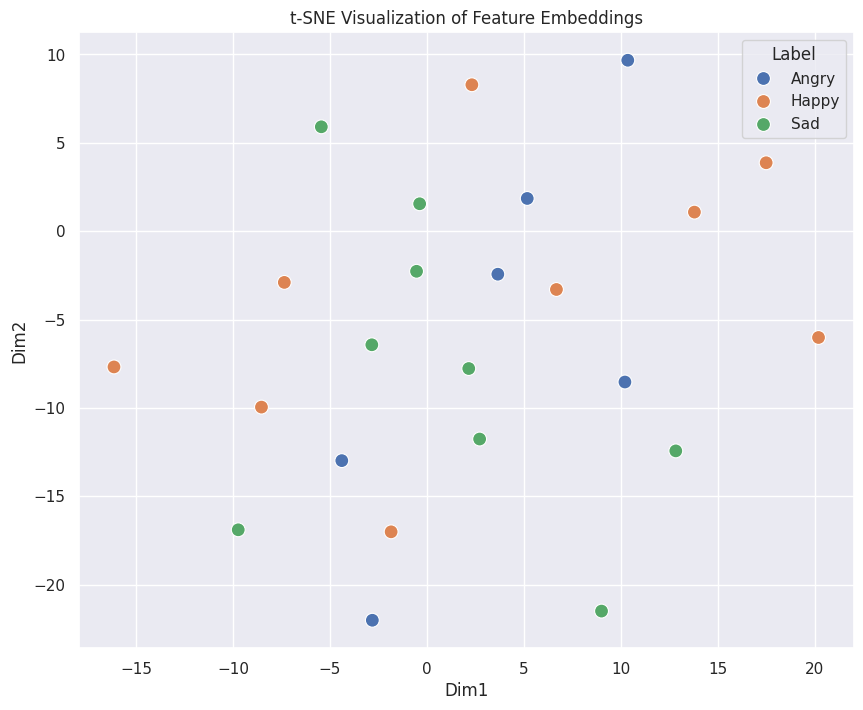

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

# Step 1: Define or load your VGG16 model explicitly with input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your custom layers (assuming this matches your notebook's structure)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)  # 3 classes: Angry, Happy, Sad

# Create the full model
vgg_model = Model(inputs=base_model.input, outputs=x)

# Step 2: Compile the model (optional, but ensures it’s ready)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Extract features from the penultimate layer
feature_model = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-3].output)  # -3 is the Dense(128) layer

# Step 4: Predict features using your test data
# Replace 'test_set' with your actual test data generator or array
# Example assuming test_set is a generator:
features = feature_model.predict(test_set)  # Ensure test_set is defined and preprocessed

# Step 5: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42,perplexity=5)
tsne_results = tsne.fit_transform(features)

# Step 6: Create a DataFrame for plotting
tsne_df = pd.DataFrame(tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['Label'] = test['Label'].values[:len(features)]  # Ensure 'test' is your test DataFrame

# Step 7: Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='Label', palette='deep', data=tsne_df, s=100)
plt.title('t-SNE Visualization of Feature Embeddings')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_129']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


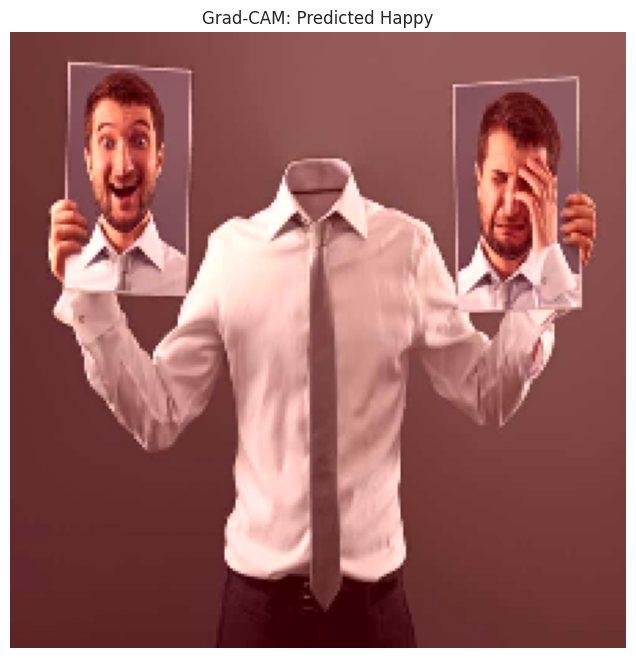

In [ ]:
from tensorflow.keras.models import Model
import cv2

def get_gradcam_heatmap(model, img_path, class_idx, layer_name='block5_conv3'):  # Changed layer_name to 'block5_conv3'
    img = plt.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Adjust size to your model's input
    img_array = np.expand_dims(img / 255.0, axis=0)

    # Get the last convolutional layer
    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * pooled_grads, axis=-1).numpy()

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))
    return heatmap

# Example usage
img_path = test['Filepath'].iloc[5]  # Pick a test image
class_idx = np.argmax(vgg_model.predict(test_set)[5])  # Predicted class, using vgg_model for prediction
heatmap = get_gradcam_heatmap(vgg_model, img_path, class_idx) # Changed model to vgg_model

# Overlay heatmap on image
img = plt.imread(img_path)
img = cv2.resize(img, (224, 224))
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

plt.figure(figsize=(8, 8))
plt.imshow(superimposed_img / 255.0)
plt.title(f'Grad-CAM: Predicted {classes[class_idx]}')
plt.axis('off')
plt.show()

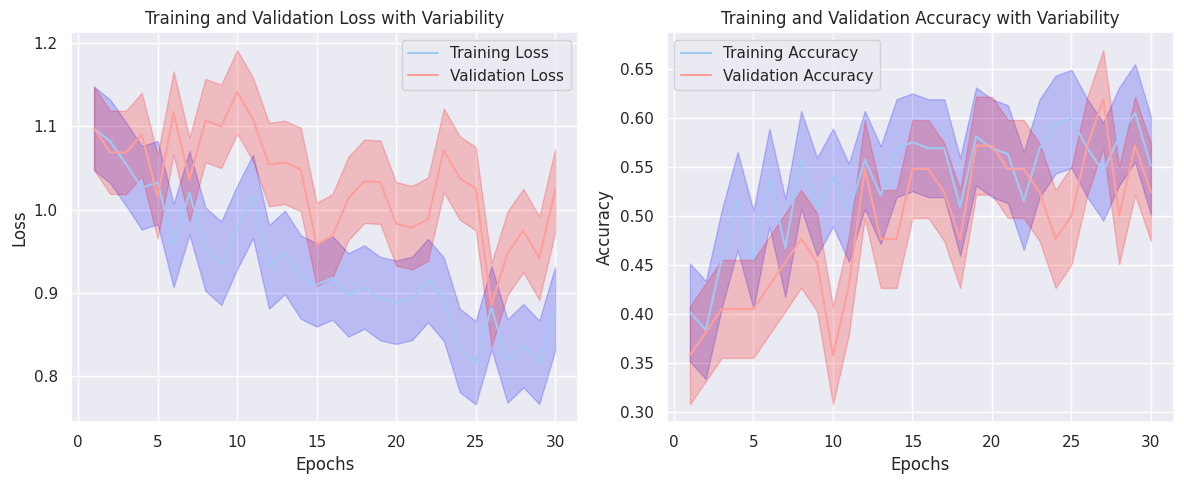

In [ ]:
# Assuming 'history' is your model's training history
history_dict = history.history

epochs = range(1, len(history_dict['loss']) + 1)
mean_loss = history_dict['loss']
val_mean_loss = history_dict['val_loss']
mean_acc = history_dict['accuracy']
val_mean_acc = history_dict['val_accuracy']

plt.figure(figsize=(12, 5))

# Loss plot with shaded confidence intervals (simulated here with ±0.05 for illustration)
plt.subplot(1, 2, 1)
plt.plot(epochs, mean_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_mean_loss, 'r-', label='Validation Loss')
plt.fill_between(epochs, np.array(mean_loss) - 0.05, np.array(mean_loss) + 0.05, color='blue', alpha=0.2)
plt.fill_between(epochs, np.array(val_mean_loss) - 0.05, np.array(val_mean_loss) + 0.05, color='red', alpha=0.2)
plt.title('Training and Validation Loss with Variability')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mean_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_mean_acc, 'r-', label='Validation Accuracy')
plt.fill_between(epochs, np.array(mean_acc) - 0.05, np.array(mean_acc) + 0.05, color='blue', alpha=0.2)
plt.fill_between(epochs, np.array(val_mean_acc) - 0.05, np.array(val_mean_acc) + 0.05, color='red', alpha=0.2)
plt.title('Training and Validation Accuracy with Variability')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Summary

Project Summary: Image Classification with CNN and VGG16

**1. Dataset:**The project uses a dataset"broken-eggs" for image classification. The dataset contains images of Human Face Emotions, and the objective is to classify them into one of three categories

**2. Data Preprocessing:** The dataset is loaded and organized into pandas DataFrames for easier handling. Data augmentation and preprocessing are performed using the ImageDataGenerator from Keras. The images are scaled to a range between 0 and 1.

**3. CNN Model Architecture:** The project starts with a Convolutional Neural Network (CNN) model. The model consists of multiple Conv2D layers, with ReLU activation functions and max-pooling layers to downsample the feature maps. After several convolutional layers, a Flatten layer is used to convert the 3D feature maps into a 1D vector. The model also includes fully connected Dense layers with ReLU activation and a final Dense layer with 3 units (output classes) and a softmax activation function.

**4. Model Compilation and Training:** The CNN model is compiled with categorical cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. The model is trained using the training dataset and evaluated on the validation dataset.

**5. Transfer Learning with VGG16:** After training the CNN model, the project proceeds with Transfer Learning using the VGG16 model. The VGG16 model is loaded with pretrained weights on the ImageNet dataset. The fully connected layers of VGG16 are removed, leaving only the convolutional layers.

**6. Adding Dense Layers:** On top of the VGG16 base, a new model is constructed by adding fully connected Dense layers, including a Flatten layer, a Dense layer with 128 units, a Dropout layer, and a final Dense layer with 3 units (output classes) and a softmax activation function.

**7. Model Compilation and Training (VGG16):** The new model with VGG16 as the base is compiled with categorical cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric. The VGG16 base model's weights are frozen during training to facilitate transfer learning. The model is trained using the training dataset and evaluated on the validation dataset.

**8. Prediction and Evaluation:** Both the CNN model and the VGG16-based model are used to make predictions on the test dataset. The performance of both models is evaluated using accuracy and other relevant metrics.

**9. Visualization:** Training and validation loss and accuracy curves are plotted to visualize the model's performance during training for both the CNN model and the VGG16-based model.

**Summary Outcome: The project aims to classify images of Face Emotions into three categories using a CNN model and transfer learning with the VGG16 model. The CNN model is trained from scratch, while the VGG16-based model leverages pretrained VGG16 weights to achieve potentially better performance with less training data. Both models' evaluation metrics and visualizations are used to assess their accuracy and identify potential areas for improvement.**